# 11 Xarray


Objectives

* Use the xarray package to connect with the HSDS
* Understand the basic data structures in Xarray
* Read and write netCDF files using Xarray and h5netcdf
* Plotting using Xarray

In [6]:
# h5netcdf package not pre-installed, so install here
! pip install h5netcdf

In [7]:
import xarray as xr

In [8]:
# This is the location of a NetCDF file that has been installed in HDFLab
# The "hdf5:/" prefix indicates it's an HSDS domain rather than a regular posix file
domain_path = "hdf5://shared/NASA/NEX-DCP30/tasmax_amon_BCSD_rcp60_r1i1p1_CONUS_NorESM1-M_202101-202512.nc"

In [9]:
# load the dataset
# Note - xarray uses the term "dataset" to refer to what HDF5 users would call a file
# An HDF5 dataset is called a "variable". This can be a bit confusing!
# The engine parameter says to use the h5netcdf package.  In turn h5netcdf will use h5pyd
# when it sees the "hdf5://" prefix in the domain path
ds = xr.open_dataset(domain_path, engine="h5netcdf")

In [10]:
# From here on, everything is much the same as with XArray used with regular posix files
# the standard representation of a dataset will show dimensions, coordinates, data, and attribute 
# components
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 3105, lon: 7025, time: 60)
Coordinates:
  * lat        (lat) float64 24.06 24.07 24.08 24.09 ... 49.9 49.91 49.92 49.93
  * lon        (lon) float64 235.0 235.0 235.0 235.0 ... 293.5 293.5 293.5 293.5
  * time       (time) datetime64[ns] 2021-01-16T12:00:00 ... 2025-12-16T12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tasmax     (time, lat, lon) float32 ...
    time_bnds  (time, bnds) datetime64[ns] ...
Attributes: (12/36)
    parent_experiment:              historical
    parent_experiment_id:           historical
    parent_experiment_rip:          r1i1p1
    Conventions:                    CF-1.4
    project_id:                     NEX
    product:                        downscaled
    ...                             ...
    title:                          800m Downscaled NEX CMIP5 Climate Project...
    model_id:                       BCSD
    references:                     BCSD method: Wood AW, Maurer EP, Kumar A,...
    DOI:                            http://dx.doi.org/10.7292/W0WD3XH4
    experiment:                     RCP6
    contact:                        Dr. Rama Nemani: rama.nemani@nasa.gov, Dr...

In [11]:
# pull out "tasmax" dataarray with dictionary syntax
tasmax = ds["tasmax"]
tasmax

<xarray.DataArray 'tasmax' (time: 60, lat: 3105, lon: 7025)>
[1308757500 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 24.06 24.07 24.08 24.09 ... 49.9 49.91 49.92 49.93
  * lon      (lon) float64 235.0 235.0 235.0 235.0 ... 293.5 293.5 293.5 293.5
  * time     (time) datetime64[ns] 2021-01-16T12:00:00 ... 2025-12-16T12:00:00
Attributes:
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...
    cell_measures:     area: areacella
    cell_methods:      time: maximum within days time: mean over days
    comment:           monthly mean of the daily-maximum near-surface air tem...
    coordinates:       height
    history:           2011-06-02T18:18:33Z altered by CMOR: Treated scalar d...
    long_name:         Daily Maximum Near-Surface Air Temperature
    original_name:     TREFHTMX
    standard_name:     air_temperature
    units:             K

In [12]:
# or by using dot notation
ds.tasmax

<xarray.DataArray 'tasmax' (time: 60, lat: 3105, lon: 7025)>
[1308757500 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 24.06 24.07 24.08 24.09 ... 49.9 49.91 49.92 49.93
  * lon      (lon) float64 235.0 235.0 235.0 235.0 ... 293.5 293.5 293.5 293.5
  * time     (time) datetime64[ns] 2021-01-16T12:00:00 ... 2025-12-16T12:00:00
Attributes:
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...
    cell_measures:     area: areacella
    cell_methods:      time: maximum within days time: mean over days
    comment:           monthly mean of the daily-maximum near-surface air tem...
    coordinates:       height
    history:           2011-06-02T18:18:33Z altered by CMOR: Treated scalar d...
    long_name:         Daily Maximum Near-Surface Air Temperature
    original_name:     TREFHTMX
    standard_name:     air_temperature
    units:             K

In [13]:
# named dimensions
ds.tasmax.dims

('time', 'lat', 'lon')

In [14]:
# extracting coorindate variables from .coords
ds.coords["lon"]

<xarray.DataArray 'lon' (lon: 7025)>
array([234.979167, 234.9875  , 234.995833, ..., 293.495833, 293.504167,
       293.5125  ])
Coordinates:
  * lon      (lon) float64 235.0 235.0 235.0 235.0 ... 293.5 293.5 293.5 293.5
Attributes:
    valid_range:    [  0. 360.]
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    bounds:         lon_bnds
    axis:           X

In [15]:
# .attrs is a dictionary that can contain arbitrary python objects. Much like with h5py or h5pyd
tasmax.attrs

{'associated_files': 'baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_NorESM1-M_rcp60_r0i0p0.nc areacella: areacella_fx_NorESM1-M_rcp60_r0i0p0.nc',
 'cell_measures': 'area: areacella',
 'cell_methods': 'time: maximum within days time: mean over days',
 'comment': 'monthly mean of the daily-maximum near-surface air temperature.',
 'coordinates': 'height',
 'history': "2011-06-02T18:18:33Z altered by CMOR: Treated scalar dimension: 'height'. 2011-06-02T18:18:33Z altered by CMOR: Converted type from 'd' to 'f'.",
 'long_name': 'Daily Maximum Near-Surface Air Temperature',
 'original_name': 'TREFHTMX',
 'standard_name': 'air_temperature',
 'units': 'K'}

In [16]:
# The data array is three-dimensional: time, lon, and lat coordinates
tasmax.shape

(60, 3105, 7025)

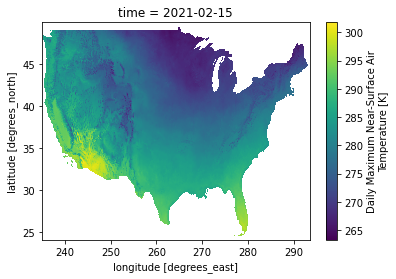

In [17]:
# Plotting methods are built into Xarray.
# Xarray uses it's mapping of dimensions to correctly setup
# plot axes and legend
# time=1 will plot the second time index
ds.tasmax.isel(time=1).plot(x="lon")